In [1]:
import os
import sys
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
path = 'c:/Users/emili/Documents/complex-frogs/cs3220_A5/cs3220_A5_tasks/src' #@param {type: "string"}
sys.path.append(path)

1.

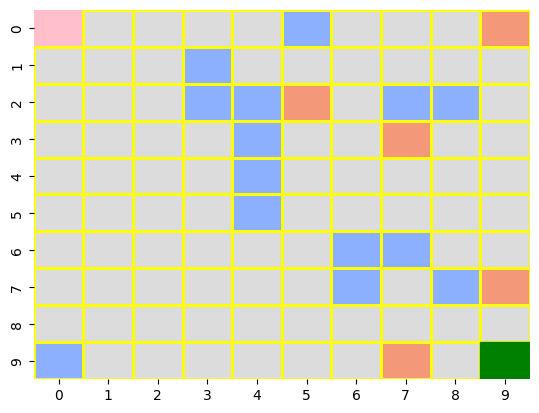

In [2]:
from mazeData import makeMaze
n=10
a=makeMaze(n)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap


def draw_maze(maze):
    fig, ax = plt.subplots()
    colors = sns.color_palette('coolwarm', len(np.unique(maze)))
    cmap = ListedColormap(colors)
    sns.heatmap(maze, cmap=cmap, annot=False, cbar=False)
    for i in range(maze.shape[0]):
      for j in range(maze.shape[1]):
        rect=patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
        ax.add_patch(rect)
        #plt.gca().add_patch(patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
        if i==0 and j==0:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='pink')
            ax.add_patch(rect)
        if i==maze.shape[0]-1 and j==maze.shape[1]-1:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='green')
            ax.add_patch(rect)

    plt.show()


draw_maze(a)



In [3]:
from mazeData import defineMazeAvailableActions
from mazeData import makeMazeTransformationModel
from mazeGraphClass import mazeGraph
from mazeProblemClass import MazeProblem
from mazeData import getFoodLocation
from nodeClass import Node
import math
from agentsPrograms import A_StarSearchAgentProgram
from agents import ProblemSolvingMazeAgentAStar

mazeAvailableActs=defineMazeAvailableActions(a)
maze=makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph=mazeGraph(maze)
initState, goalState=(0,0),getFoodLocation(a)
mp1=MazeProblem(initState,goalState,mazeWorldGraph)
node = Node(mp1.initial)
print(node.path_cost+round(math.dist(node.state, mp1.goal),2))
f1=A_StarSearchAgentProgram(math.dist)
f1(mp1)


9.0
[(9.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(10.0, <Node (0, 1)>), (10.055, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(10.055, <Node (1, 0)>), (11.0, <Node (0, 2)>), (11.062, <Node (1, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
Child node path cost: 2
Nodes expanded: 3
[(11.0, <Node (0, 2)>), (11.062, <Node (1, 1)>), (11.22, <Node (2, 0)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
Child node path cost: 6
The child node <Node (1, 2)>.
Child node path cost: 5
Nodes expanded: 4
[(11.062, <Node (1, 1)>), (11.22, <Node (2, 0)>), (12.0, <Node (0, 3)>), (12.071, <Node (1, 2)>)]
The node (1, 1) is extracted from frontier:
The child

<Node (0, 9)>

In [4]:
AStar_MazeAgent1=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalState)
AStar_MazeAgent1.goal

(np.int64(0), np.int64(9))

In [5]:
print()
print(AStar_MazeAgent1((0,2)))


[(7.0, <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (0, 3)>.
Child node path cost: 2
The child node <Node (1, 2)>.
Child node path cost: 1
Nodes expanded: 1
[(8.0, <Node (0, 3)>), (10.0, <Node (0, 1)>), (8.071, <Node (1, 2)>)]
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)>.
Child node path cost: 4
Nodes expanded: 2
[(8.071, <Node (1, 2)>), (10.0, <Node (0, 1)>), (9.0, <Node (0, 4)>)]
The node (1, 2) is extracted from frontier:
The child node <Node (1, 1)>.
Child node path cost: 3
The child node <Node (2, 2)>.
Child node path cost: 2
Nodes expanded: 3
[(9.0, <Node (0, 4)>), (9.280000000000001, <Node (2, 2)>), (11.062, <Node (1, 1)>), (10.0, <Node (0, 1)>)]
The node (0, 4) is extracted from frontier:
The child node <Node (1, 4)>.
Child node path cost: 5
Nodes expanded: 4
[(9.280000000000001, <Node (2, 2)>), (10.0, <Node (0, 1)>), (11.062, <Node (1, 1)>), (10.099, <Node (1,

In [6]:
goalStates=[goalState, (n-1,n-1)]
initState

(0, 0)

In [7]:
AStar_MazeAgent2=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
AStar_MazeAgent2.goal

[(np.int64(0), np.int64(9)), (9, 9)]

In [8]:
AStar_MazeAgent2.run()

goal list: [(np.int64(0), np.int64(9)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(9))
[(9.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(10.0, <Node (0, 1)>), (10.055, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(10.055, <Node (1, 0)>), (11.0, <Node (0, 2)>), (11.062, <Node (1, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
Child node path cost: 2
Nodes expanded: 3
[(11.0, <Node (0, 2)>), (11.062, <Node (1, 1)>), (11.22, <Node (2, 0)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
Child node path cost: 6
The child node <Node (1, 2)>.
Child node path cost: 5
Nodes expanded: 4
[(11.062, <Node (1, 1)>), (11.22, <Node (2

([['right',
   'right',
   'right',
   'right',
   'down',
   'right',
   'right',
   'right',
   'right',
   'right',
   'up'],
  ['down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down']],
 [[<Node (0, 0)>,
   <Node (0, 1)>,
   <Node (0, 2)>,
   <Node (0, 3)>,
   <Node (0, 4)>,
   <Node (1, 4)>,
   <Node (1, 5)>,
   <Node (1, 6)>,
   <Node (1, 7)>,
   <Node (1, 8)>,
   <Node (1, 9)>,
   <Node (0, 9)>],
  [<Node (np.int64(0), np.int64(9))>,
   <Node (1, 9)>,
   <Node (2, 9)>,
   <Node (3, 9)>,
   <Node (4, 9)>,
   <Node (5, 9)>,
   <Node (6, 9)>,
   <Node (7, 9)>,
   <Node (8, 9)>,
   <Node (9, 9)>]])

In [9]:
goalStates=[goalState, (n-1,n-1)]
goalStates

[(np.int64(0), np.int64(9)), (9, 9)]

In [11]:
AStar_MazeAgent3=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
a
s,p=AStar_MazeAgent3.run()

goal list: [(np.int64(0), np.int64(9)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(9))
[(9.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(10.0, <Node (0, 1)>), (10.055, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(10.055, <Node (1, 0)>), (11.0, <Node (0, 2)>), (11.062, <Node (1, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
Child node path cost: 2
Nodes expanded: 3
[(11.0, <Node (0, 2)>), (11.062, <Node (1, 1)>), (11.22, <Node (2, 0)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
Child node path cost: 6
The child node <Node (1, 2)>.
Child node path cost: 5
Nodes expanded: 4
[(11.062, <Node (1, 1)>), (11.22, <Node (2

2.

In [ ]:
import copy
resolvedMaze=copy.deepcopy(a)
i=3
for path in p:
  for node in path:
    resolvedMaze[node.state[0],node.state[1]]=i
  i+=1
draw_maze(resolvedMaze)
#first resolved maze 